# Trabajo Practico de Prbabilidad y estadistica.
# ***- Productos Elaborados a partir del Petróleo -***




Enunciado del trabajo:


1.   Encontrar un problema de interés.
2.   Buscar una base de datos con información pertinente.
3.Cargar la base de datos en un notebook.
4.Explorar la base de datos.
5.Encontrar las variables que describan la información en la que ustedes están interesados.
6.Caracterizar las distribuciones de esas variables con medidas de tendencia central y de forma. (Medias, medianas, frecuencias, varianzas, cuartiles, curtosis, etc.). Mirar en la bibliografía los capítulos dedicados a Estadísitca Descriptiva.
7.Representar esa distribución de varias maneras (histogramas, gráficos de barras, gráficos de cajas, etc).
8.Sacar conclusiones respecto de la información obtenida.
9.Escribir un informe contando el análisis realizado y los resultados encontrados.


In [1]:
import pandas as pd # el formato es import "librería" as "nombre con el la queremos llamar".
import matplotlib.pyplot as plt # matplotlib es una librería para hacer gráficos.
import numpy as np # numpy es una librería para hacer cuentas de forma eficiente.
import matplotlib.gridspec as gridspec # gridspec es una libreria que permite hacer
import seaborn as sb # libreria para grafico de barras.
import scipy as sc
from scipy.stats import linregress #SciPy se usa para el cálculo de regresión lineal.
import random

Shif y enter para correr el bloque de codigo

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context #esta celda permite saltar errores de certificados de las páginas que contienen los datos.

Los datos consultados son datos proporcionados por el gobierno nacional Argentino mediante su sitio Web [Datos.gob.ar](https://datos.gob.ar/), en el cual podemos encontrar una gran cantidad de datos de diversas areas.

Para el desarrollo de este proyecto se realizara la consulta al Area de Energia utilizando la siguiente base de datos. [Ver Db](https://datos.gob.ar/dataset/energia-produccion-combustibles).



In [3]:
URL_Db = "http://datos.energia.gob.ar/dataset/c1c73b3a-0811-4441-9b65-e461fdce52e8/resource/c11f1dd3-c6e2-41fe-8100-19c5d6bea239/download/productos-elaborados-a-partir-del-petrleo.csv"

**pd.read_csv(Url_Db):** Se realiza la lectura de cada una de las bases de datos.

In [4]:
Data1 = pd.read_csv(URL_Db);

***DataX.shape :*** nos muestra el tamaño de la base de datos.

In [5]:
print("El tamaño de la primera base de datos es:");
print(Data1.shape);

El tamaño de la primera base de datos es:
(284934, 11)


***head() :*** Nos muestra como es las bases de datos, en este caso la segunda base de datos.

In [6]:
Data1.head()

,anio,mes,idempresa,empresa,idrefineria,refineria,idconcepto,concepto,cantidadm3,cantidadtns,observaciones
0,2009,1,SOU,Petrolera SouthPole (Empresa ficticia de prueba),ANTA,Antartida,18,Aerokerosene (Jet),200.0,200.0,NaN
1,2009,1,SOU,Petrolera SouthPole (Empresa ficticia de prueba),ANTA,Antartida,17,Aeronaftas,0.0,0.0,NaN
2,2009,1,SOU,Petrolera SouthPole (Empresa ficticia de prueba),ANTA,Antartida,13,Alconafta Grado 1,0.0,0.0,NaN
3,2009,1,SOU,Petrolera SouthPole (Empresa ficticia de prueba),ANTA,Antartida,30,Bases Lubricantes,0.0,0.0,NaN
4,2009,1,SOU,Petrolera SouthPole (Empresa ficticia de prueba),ANTA,Antartida,1,Gas de Refinería,0.0,0.0,NaN


Aca definiremos algunas variables donde se cargaran algunas columnas particulares, estas mismas luego se usaran para realizar los graficos.

Con ***Print(Data1.columns)*** podemos visualizar todas las columnas para luego realizar los graficos.

In [7]:
print(Data1.columns)

Index(['anio', 'mes', 'idempresa', 'empresa', 'idrefineria', 'refineria',
       'idconcepto', 'concepto', 'cantidadm3', 'cantidadtns', 'observaciones'],
      dtype='object')


Existen 2 maneras para poder capturar una columna de nuestra base de datos,

***Datos['nombre_de_la_columna']***

***Datos.nombre_de_la_columna ***

In [8]:
cantm3DistCero = Data1[Data1.cantidadm3 != 0]; #  Quito a toda la base de datos los valores donde la cantidadm3 es 0
cantidad = cantm3DistCero['cantidadm3'] #Seleccionamos la columna "cantidadm3" para realizar los graficos.
aux = cantidad;                         #Definimos una variable auxiliar donde capturaremos la columnas.
name = cantidad.name                    #Capturamos el nombre de la propia columna.
aux

0            200.000
6             32.560
21           901.908
22            15.200
95           697.935
             ...    
284924     10288.671
284928       103.980
284929      1078.000
284930    114378.000
284933        46.900
Name: cantidadm3, Length: 32942, dtype: float64

***Realizar una grafica.***

Para realizar un grafico utilizaremos la Libreria ***matplotlib.pyplot***, para la misma usaremos las siglas ***plt*** para usar los metodos de la libreria.

Los metodos utilizados son:
plt.figure(figsize(X,Y)) => Es el tamaño de la grafica.

        X: Ancho en pulgadas.

        Y: Alto en pulgadas.

***fig1 = plt.hist(colum,bins = Xs, range=(x,y)) =>*** Se utiliza para realizar el histograma.

      colum: son los datos que se desean reprecentar en el histograma.

      bins: número de intervalos en los que se divide el rango.
      
      range: es el rango en el que se incluira el histograma.


***plt.xlabel =>*** Etiqueta del eje X.

***plt.ylabel =>*** Etiqueta del eje Y.

***fig1.suptitle =>*** El titulo del histograma.

***pltxticks(rotation=x) =>*** Las etiquetas del eje X rota 90° en sentido horario.

***plt.show() =>*** Muestra el histograma.

Figura 1

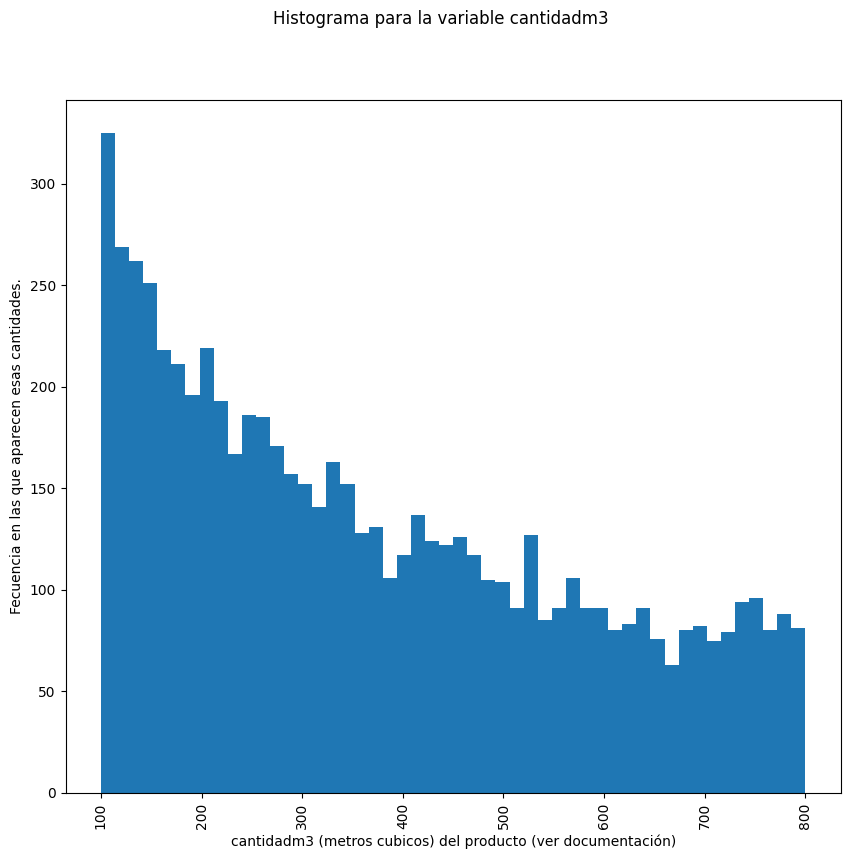

In [9]:
fig1 = plt.figure(figsize=(10, 9)) # Tamaño de la figura
plt.hist(aux, bins = 50, range=(100, 800))
plt.xlabel('{} (metros cubicos) del producto (ver documentación)'.format(name)) #etiqueta eje x
plt.ylabel('Fecuencia en las que aparecen esas cantidades.') # etiqueta eje y
fig1.suptitle('Histograma para la variable {}'.format(name)) # título
plt.xticks(rotation=90)
plt.show()

A los datos ya elegidos podemos calcular algunos datos por ejemplo:

***La media:*** de la cantidad de productos en m3 (Metros cubicos) de los primeros 30000 (treinta mil datos).

***Mediana:*** Valor que se encuentra en el centro de los datos analizados.

***Moda:***Es el dato que mas se repite en el conjunto de datos.

Figura 2

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000.]),
 [Text(-5000.0, 0, '−5000'),
  Text(0.0, 0, '0'),
  Text(5000.0, 0, '5000'),
  Text(10000.0, 0, '10000'),
  Text(15000.0, 0, '15000'),
  Text(20000.0, 0, '20000'),
  Text(25000.0, 0, '25000'),
  Text(30000.0, 0, '30000'),
  Text(35000.0, 0, '35000'),
  Text(40000.0, 0, '40000')])

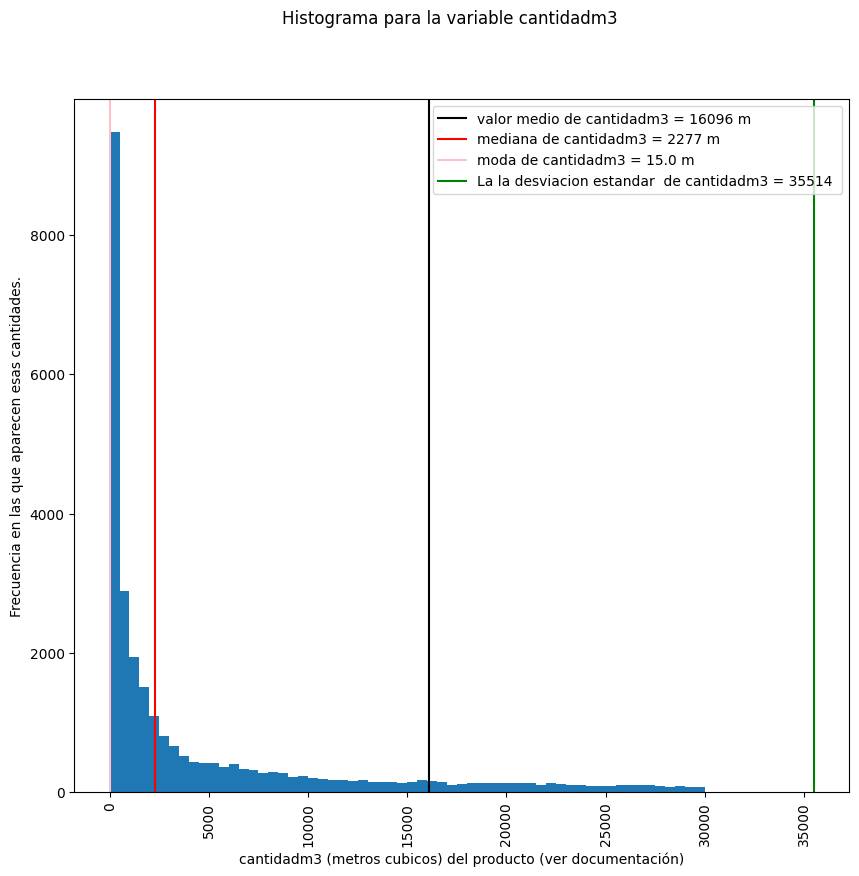

In [13]:
fig2 = plt.figure(figsize=(10, 9)) # Tamaño de la figura
mode=sc.stats.mode(aux, keepdims=False)[0]
plt.hist(aux, bins = 60, range=(0, 30000))

plt.xlabel('{} (metros cubicos) del producto (ver documentación)'.format(name)) #etiqueta eje x
plt.ylabel('Frecuencia en las que aparecen esas cantidades.') # etiqueta eje y
fig2.suptitle('Histograma para la variable {}'.format(name)) # título

plt.axvline(x = aux.mean(), color = 'black', label = 'valor medio de {} = {} m '.format(name, round(aux.mean()))) #Media de la cantidad de producto.
plt.axvline(x = aux.median(), color = 'red', label = 'mediana de {} = {} m '.format(name, round(aux.median())))
plt.axvline(x = mode, color = 'pink', label = 'moda de {} = {} m '.format(name, mode))
plt.axvline(x = aux.std(),color='green', label='La la desviacion estandar  de {} = {} '.format(name,round(aux.std())))


plt.legend(bbox_to_anchor=(1.0, 1), loc='upper right')
plt.xticks(rotation=90)

Con la funcion ***describe*** podemos obtener datos estadisticos de la base de datos.

***Count:*** Cantidad de elementos X columna.

***mean:*** La media total X Columna.

***std:*** Es la desviación estandar.

***min:*** Es el valor minimo en la columna.

***max:*** Es el valor maximo en la columna.

***El porcentaje:*** Son los percentiles X columna.

In [ ]:
cantm3DistCero = Data1[Data1.cantidadm3 != 0]; #  Quito a toda la base de datos los valores donde la cantidadm3 es 0
firstThirtyMData = cantm3DistCero.head(30000)
print(round(firstThirtyMData.describe()))
#Data1.describe()

          anio      mes  idconcepto  cantidadm3  cantidadtns
count  30000.0  30000.0     30000.0     30000.0      30000.0
mean    2015.0      6.0        25.0     15749.0      12432.0
std        3.0      3.0        17.0     35053.0      28526.0
min     2009.0      1.0         1.0     -3769.0      -2565.0
25%     2012.0      3.0        11.0       340.0        285.0
50%     2015.0      6.0        23.0      2185.0       1661.0
75%     2018.0      9.0        37.0     15071.0      11599.0
max     2022.0     12.0        57.0    341970.0     289221.0


Información sobre las empresas que más cantidad obttuvieron desde el año 2010 hasta 2023. Una manera de hacerlo es ordenar la base de datos según producción de mayor a menor y hacer un gráfico comparativo.

Para realizar este grafico definiremos unas cuantas variables de las cuales sacaremos los propios datos.

          cantidadtnt: cantidad de producto en toneladas.

          anio: Año en el que se tienia el producto.
          
          refineria: Refineria que tiene el producto.

In [ ]:
cantidadtns=Data1['cantidadtns']                                      # En esta parte del codigo declaramos las variables
anio=Data1['anio']
refineria=Data1['refineria']

Ordenamos los datos de manera decreciente los datos de ***cantidadtns***, luego lo ordenamos por el año e imprimiendo a que empresa pertenece cada dato.

In [ ]:
Data_cantidadtns = Data1.sort_values('cantidadtns', ascending=False)  #Creamos el objeto pandas Data_cantidadtns y lo ordenamos de manera
                                                                     # descendiente con ".sort_values('cantidadtns', ascending=False)"
Data_cantidadtns.head()                                              # Inspeccionamos que aspecto tiene Data_cantidadtns

,anio,mes,idempresa,empresa,idrefineria,refineria,idconcepto,concepto,cantidadm3,cantidadtns,observaciones
40108,2011,10,YPF,YPF S.A.,LDC,Luján de Cuyo,22,Gasoil Grado 2 (Común),341970.0,289221.0,NaN
52698,2012,5,YPF,YPF S.A.,LDC,Luján de Cuyo,22,Gasoil Grado 2 (Común),336388.0,284325.0,NaN
43741,2011,12,YPF,YPF S.A.,LDC,Luján de Cuyo,22,Gasoil Grado 2 (Común),335162.0,283909.0,NaN
23562,2011,1,YPF,YPF S.A.,LDC,Luján de Cuyo,22,Gasoil Grado 2 (Común),334325.0,282557.0,NaN
73808,2013,4,YPF,YPF S.A.,LDC,Luján de Cuyo,22,Gasoil Grado 2 (Común),332998.0,281862.0,NaN


Figura 3

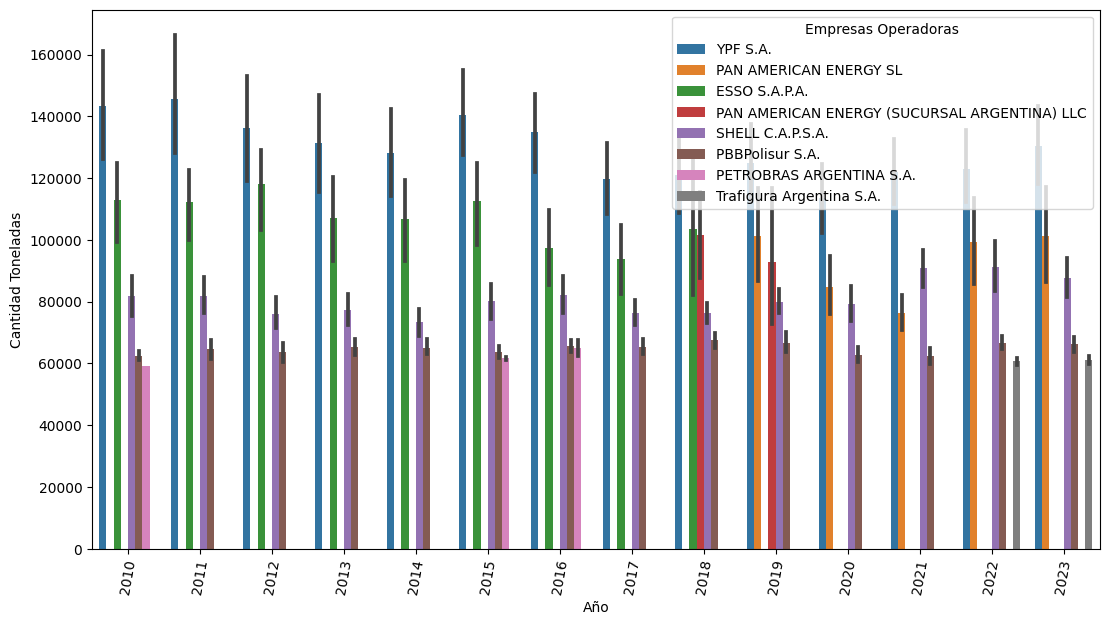

In [ ]:
plt.figure(figsize=(13, 7))
fig3 = sb.barplot(x = Data_cantidadtns["anio"][ :1800], y = Data_cantidadtns["cantidadtns"], hue= Data_cantidadtns["empresa"][:1800])
plt.xlabel("Año")
plt.ylabel("Cantidad Toneladas")
h, l = fig3.get_legend_handles_labels()
fig3.legend(h, l, title="Empresas Operadoras")
plt.xticks(rotation=80)
plt.show()

Realizamos lo mismo que antes pero ordemandolo en ***cantidadm3***

In [ ]:
cantidadEmpresa = Data1.sort_values('cantidadm3',ascending=False)
cantidadEmpresa.head()

,anio,mes,idempresa,empresa,idrefineria,refineria,idconcepto,concepto,cantidadm3,cantidadtns,observaciones
40108,2011,10,YPF,YPF S.A.,LDC,Luján de Cuyo,22,Gasoil Grado 2 (Común),341970.0,289221.0,NaN
52698,2012,5,YPF,YPF S.A.,LDC,Luján de Cuyo,22,Gasoil Grado 2 (Común),336388.0,284325.0,NaN
43741,2011,12,YPF,YPF S.A.,LDC,Luján de Cuyo,22,Gasoil Grado 2 (Común),335162.0,283909.0,NaN
23562,2011,1,YPF,YPF S.A.,LDC,Luján de Cuyo,22,Gasoil Grado 2 (Común),334325.0,282557.0,NaN
73808,2013,4,YPF,YPF S.A.,LDC,Luján de Cuyo,22,Gasoil Grado 2 (Común),332998.0,281862.0,NaN


Figura 4

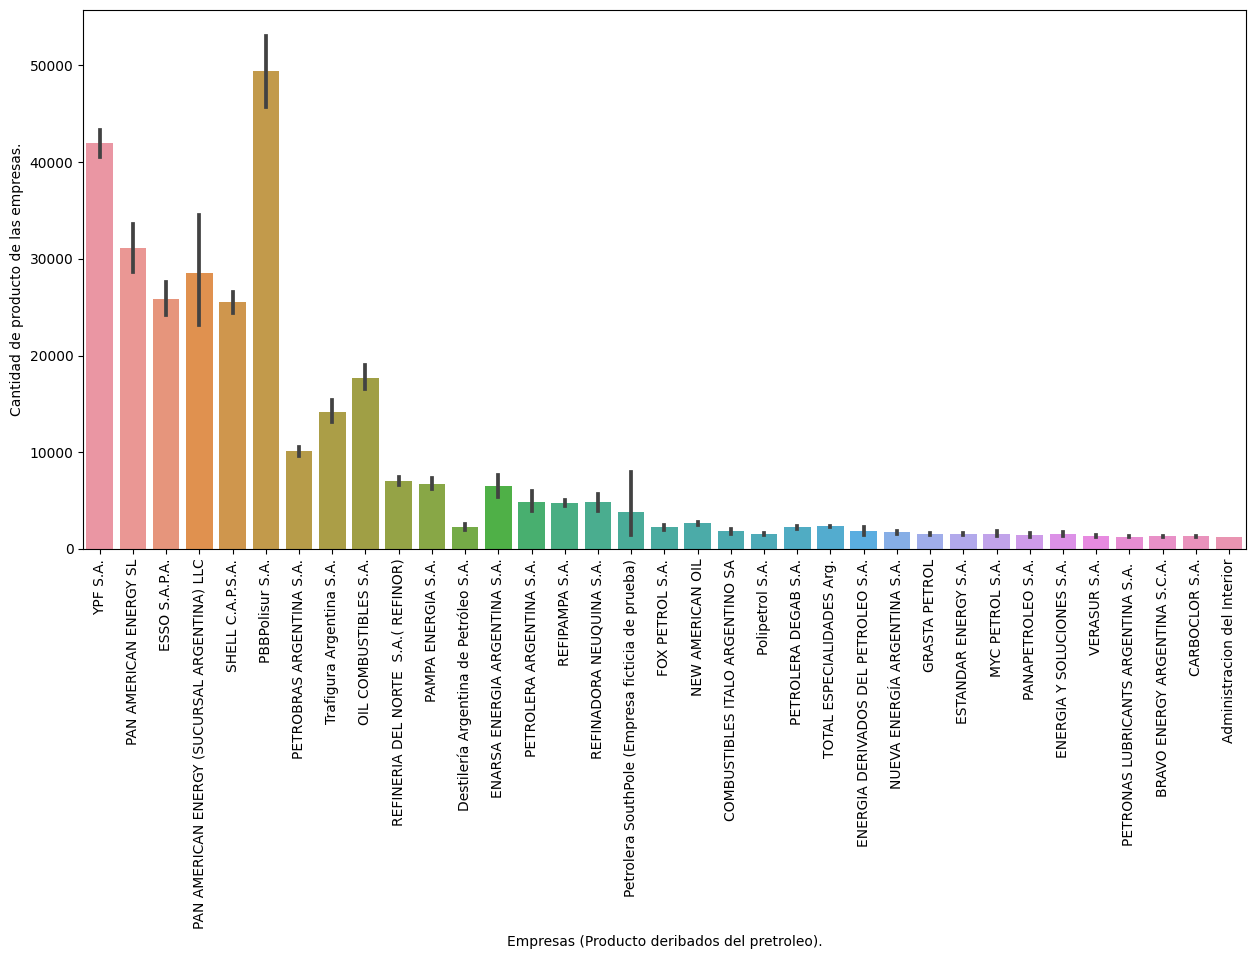

In [ ]:
fig4 = plt.figure(figsize=(15, 7))
sb.barplot(x = cantidadEmpresa["empresa"][:20000],y = cantidadEmpresa['cantidadm3'],estimator = np.mean) #estimador= np.mean: El alto es la media del la empresa
plt.xlabel("Empresas (Producto deribados del pretroleo).")
plt.ylabel("Cantidad de producto de las empresas.")
plt.xticks(rotation=90)
plt.show()

Texto 2


In [ ]:
cantm3 = cantm3DistCero
cantm3Aux = cantm3['cantidadm3']
atrAux = cantm3Aux
cantm3 = cantm3['cantidadm3'].tolist()
print(cantm3Aux)

0            200.000
6             32.560
21           901.908
22            15.200
95           697.935
             ...    
284924     10288.671
284928       103.980
284929      1078.000
284930    114378.000
284933        46.900
Name: cantidadm3, Length: 32942, dtype: float64


In [ ]:
n=1000
atributo = cantm3
atributo_name = atrAux.name
sampled_list1 = random.sample(atributo, n)#Muestro sin reemplazo
sampled_list2 = random.sample(atributo, n)
sampled_list3 = random.sample(atributo, n)
sampled_list4 = random.sample(atributo, n)
sampled_list5 = random.sample(atributo, n)
sampled_list5 = random.sample(atributo, n)
sampled_list6 = random.sample(atributo, n)

Figura 5

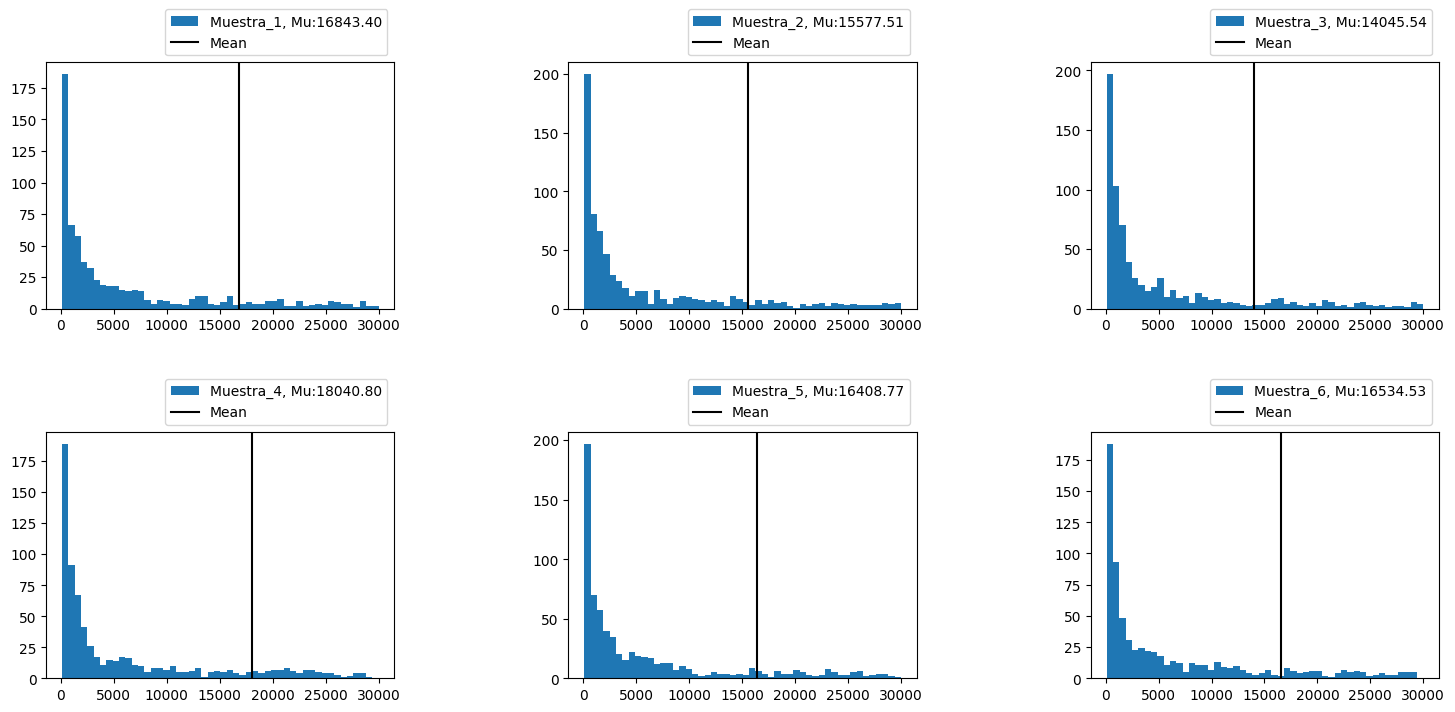

In [ ]:
nbins = 50
ran = (100, 30000)
gs = gridspec.GridSpec(2, 3, left=0.01, right=2, wspace=0.5, hspace=0.5)
fig5 = plt.figure(figsize=(7, 8))

sampled_lists = [sampled_list1, sampled_list2, sampled_list3, sampled_list4, sampled_list5, sampled_list6]

for i, sampled_list in enumerate(sampled_lists):
    ax = plt.subplot(gs[i // 3, i % 3])
    mu = np.mean(sampled_list)
    sigma = np.std(sampled_list)

    ax.hist(sampled_list, bins=nbins, range=ran, label=f'Muestra_{i + 1}, Mu:{mu:.2f}')
    ax.axvline(x=mu, color='black', label='Mean')

    ax.legend(bbox_to_anchor=(1.0, 1), loc='lower right')

plt.show()

Generemos 30000 (treintamil) de tamaño ***n*** (mil en nuestro caso) muestras a partir de nuestra población.

In [ ]:
np.random.seed(0)
cantm3 = cantm3DistCero
cantm3 = cantm3['cantidadm3'].tolist()
num_samp_exp = 32000
n = 1000
samp_means_exp= []

for i in range(num_samp_exp):
  aux = np.random.choice(cantm3, n) #Muestro con reemplazo
  sample_mean = np.mean(aux)
  samp_means_exp.append(sample_mean)

sample_mean_of_means = np.mean(samp_means_exp)
sample_std_of_means = np.std(samp_means_exp)
print(sample_mean_of_means)
print(sample_std_of_means)

16088.749183964475
1124.1262915861873


Luego de obtener todas las muestras podemos graficar la distribucion normal.

Figura 6

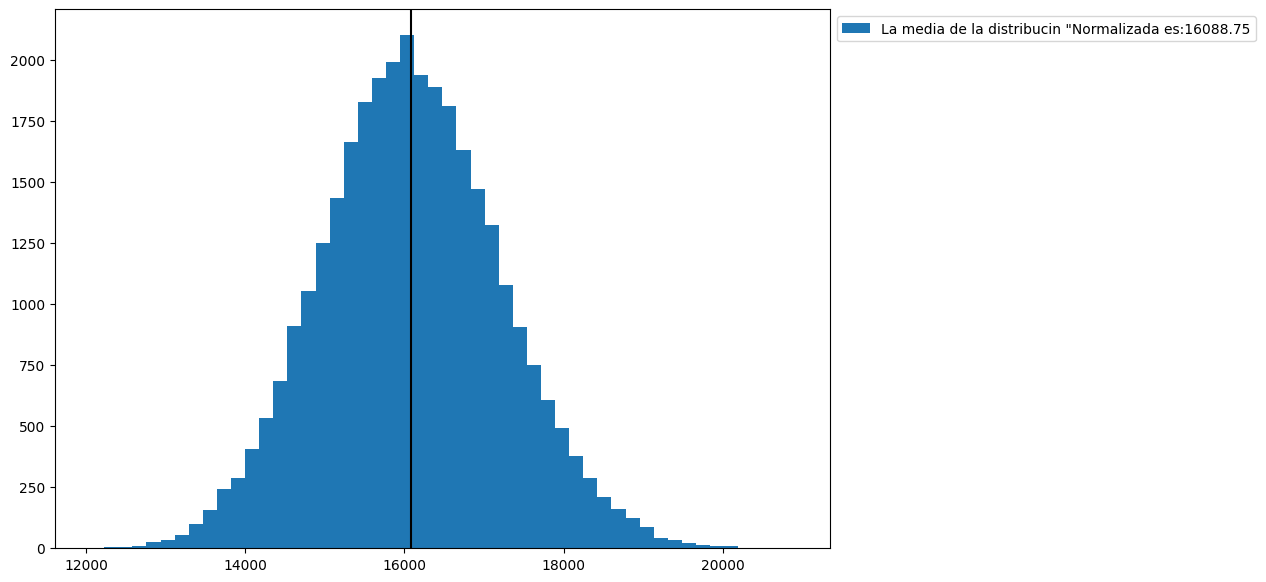

In [ ]:
fig6 = plt.figure(figsize=(10, 7))
plt.hist(samp_means_exp, bins = 50, label='La media de la distribucin "Normalizada es:{}'.format(round(sample_mean_of_means,2)));
plt.legend(bbox_to_anchor=(1.0, 1), loc='best')
plt.axvline(x = sample_mean_of_means.mean(),color = 'black')
plt.show()

Otro dato de importancia que podriamos sacar de es la ***covarianza*** y*** el coeficiente de coorelacion***

***Cov(x,y)***: Covarianza de X,Y. es  

se calcula de la siguiente manera:
***Cov(x,y) = E(x,y) - E(x)E(y)***

El coeficiente de coorelacion: Es

Se calcula de la siguiente manera:
***Cov(x,y)/V(X)V(Y)***

con :

    V(x) => Es la varianza de X
    V(y) => Es la varianza de y

Figura 7

<ipython-input-21-7e46434db4bc>:8: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  CovXY = Data1.cov()
<ipython-input-21-7e46434db4bc>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  coofCorr = Data1.corr()




Pendiente (slope): 0.7987834260038912
Termino independiente (intercept): -20.07441440361913
Valor p (Grado de relacion): 0.0
La covarianza es: 137628014.5108512
Este es el cooeficiente de correlación:0.9884403576102464


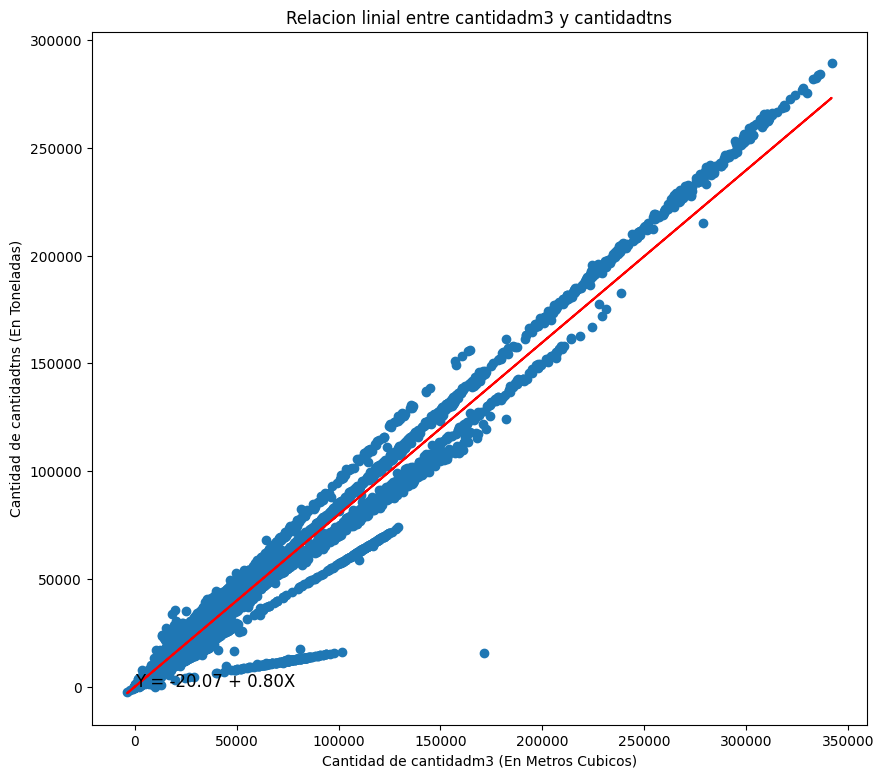

In [ ]:
slope, intercept, r_value, p_value, std_err = linregress(Data1['cantidadm3'], Data1['cantidadtns'])

x = Data1['cantidadm3']
xName = x.name;
y = Data1['cantidadtns']
yName = y.name;

CovXY = Data1.cov()
CovXY = CovXY.loc['cantidadm3','cantidadtns']
coofCorr = Data1.corr()
coofCorr = Data1['cantidadm3'].corr(Data1['cantidadtns'])


fig7 = plt.figure(figsize=(10, 9))
plt.scatter(Data1['cantidadm3'],Data1['cantidadtns'],
            label="Datos")
plt.plot(Data1['cantidadm3'], intercept + slope * Data1['cantidadm3'], 'red', label='Línea de Regresión') #Grafica la recta.
plt.xlabel("Cantidad de {} (En Metros Cubicos)".format(xName))
plt.ylabel("Cantidad de {} (En Toneladas)".format(yName))
plt.title("Relacion linial entre {} y {}".format(xName,yName))

equation = f'Y = {intercept:.2f} + {slope:.2f}X'        #Describimos la ecuacion de la forma Y = mX + b
plt.text(2, 4.5, equation, fontsize=12, color='black')  #Imprime la funcion.

plt.show

print("")
print("")
print(f"Pendiente (slope): {slope}")
print(f"Termino independiente (intercept): {intercept}")
print(f"Valor p (Grado de relacion): {p_value}")
print(f"La covarianza es: {CovXY}")
print(f"Este es el cooeficiente de correlación:{r_value}")

Podemos realizar un grafico de torta para ver la probabilidad de que eligiendo una empresa al azar.

***Nota:*** *Para facilitar la visualizacion mostramos las graficas que tienen un porcentaje mayor a 2%*

In [ ]:
percEmpresa = Data1['empresa'].value_counts(normalize=True)
percEmpresaFilt = percEmpresa[percEmpresa > 0.019 ]
percEmpresaName = percEmpresaFilt.index

print(percEmpresaName)
print(percEmpresaFilt)

Index(['COMBUSTIBLES ARGENTINOS', 'REFINADORA NEUQUINA S.A.', 'YPF S.A.',
       'WENTEN S.R.L.', 'NEW AMERICAN OIL',
       'ENERGIA DERIVADOS DEL PETROLEO S.A.', 'PETROBRAS ARGENTINA S.A.',
       'REFIPAMPA S.A.', 'ESSO S.A.P.A.', 'CARBOCLOR S.A.',
       'ENARSA ENERGIA ARGENTINA S.A.', 'FOX PETROL S.A.',
       'FERCOL Lubricantes', 'BRUERRE-EME',
       'Destilería Argentina de Petróleo S.A.',
       'REFINERIA DEL NORTE  S.A.( REFINOR)', 'PETROLERA ARGENTINA S.A.',
       'GRASTA PETROL', 'PBBPolisur S.A.', 'BRAVO ENERGY ARGENTINA S.C.A.',
       'PETROLERA DEGAB S.A.', 'NUEVA ENERGÍA ARGENTINA S.A.',
       'PETRONAS LUBRICANTS ARGENTINA S.A. ', 'PETROLERA DEL CONO SUR',
       'TOTAL ESPECIALIDADES Arg.', 'ESTANDAR ENERGY S.A.',
       'SHELL C.A.P.S.A.'],
      dtype='object')
COMBUSTIBLES ARGENTINOS                  0.076439
REFINADORA NEUQUINA S.A.                 0.057329
YPF S.A.                                 0.057329
WENTEN S.R.L.                            0.037756
NE

Figura 8

<function matplotlib.pyplot.show(close=None, block=None)>

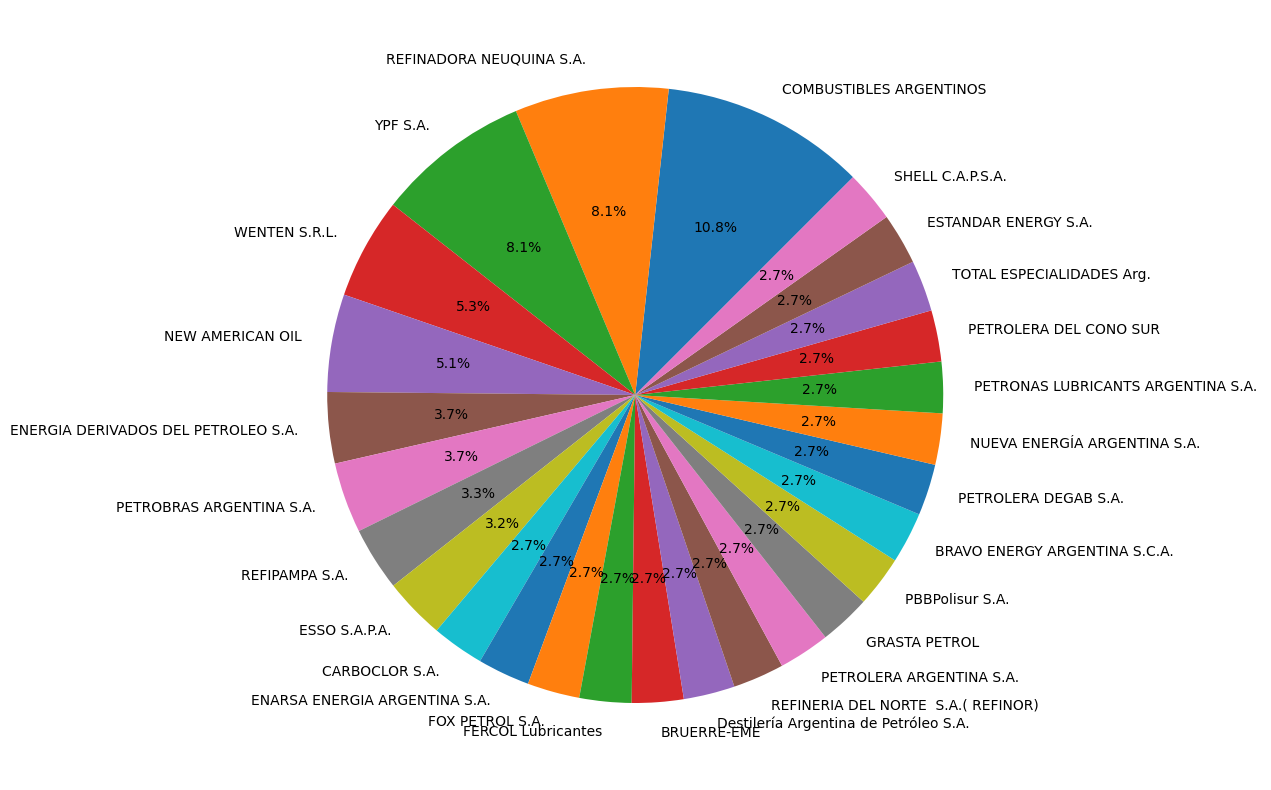

In [ ]:
fig8 = plt.figure(figsize=(10, 10))
plt.pie(percEmpresaFilt,labels=percEmpresaName, autopct='%1.1f%%', startangle=45)
#plt.legend(percEmpresaName,title="Nombre de las empresas",loc="upper right")
plt.show